In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Forbes Global 2000 (Year 2022).xlsx - Sheet1.csv')
data.head()

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
0,1,Berkshire Hathaway,Diversified Financials,United States,276094,89795.0,958784,741476
1,2,ICBC,Banking,China,208127,54028.3,5518508,214425
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376,105363.0,576041,2292077
3,4,JPMorgan Chase,Diversified Financials,United States,124542,42115.0,3954687,374446
4,5,China Construction Bank,Banking,China,202069,46887.3,4746951,181325


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank_nr       2000 non-null   object 
 1   Company       2000 non-null   object 
 2   Industry      2000 non-null   object 
 3   Country       2000 non-null   object 
 4   Sales         2000 non-null   int64  
 5   Profits       2000 non-null   float64
 6   Assets        2000 non-null   int64  
 7   Market_Value  2000 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [4]:
data.describe()

,Sales,Profits,Assets,Market_Value
count,2000.000000,2000.000000,2.000000e+03,2.000000e+03
mean,23886.202000,2500.655400,1.171142e+05,3.823843e+04
std,40942.544294,6159.244654,3.637458e+05,1.172073e+05
min,0.000000,-12052.300000,1.660000e+02,1.440000e+02
25%,5604.000000,589.850000,1.479075e+04,7.325750e+03
50%,12167.500000,1054.750000,3.200700e+04,1.662550e+04
75%,23742.500000,2266.825000,7.787025e+04,3.471200e+04
max,572754.000000,105363.000000,5.518508e+06,2.640316e+06


In [5]:
data.isnull().sum()

Rank_nr         0
Company         0
Industry        0
Country         0
Sales           0
Profits         0
Assets          0
Market_Value    0
dtype: int64

In [6]:
print(data.shape)

(2000, 8)


In [7]:
#Total number of Countries 
data['Country'].nunique()

58

In [8]:
# Total different industries
data["Industry"].nunique()

26

In [9]:
data['Industry'].value_counts()

Banking                             290
Diversified Financials              146
Construction                        127
Consumer Durables                   124
Materials                           118
Oil & Gas Operations                106
Insurance                           105
Utilities                            83
Business Services & Supplies         81
Food, Drink & Tobacco                75
Chemicals                            75
IT Software & Services               73
Transportation                       70
Retailing                            69
Drugs & Biotechnology                67
Capital Goods                        59
Technology Hardware & Equipment      56
Health Care Equipment & Services     44
Telecommunications Services          43
Trading Companies                    37
Semiconductors                       35
Conglomerates                        29
Food Markets                         26
Media                                25
Hotels, Restaurants & Leisure        19


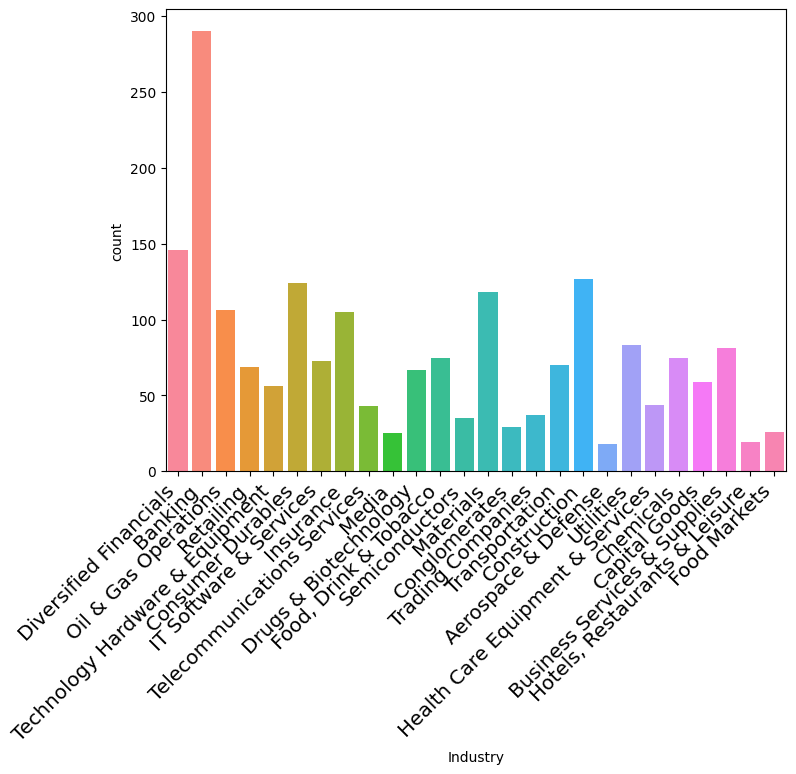

In [10]:
# Industry wise count
plt.figure(figsize=(8, 6))
ip = sns.countplot(x='Industry', data=data, saturation=1.5)
ip.set_xticklabels(ip.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='x-large')
plt.show()

In [11]:
#checking for duplicate values
data.duplicated().value_counts()  

False    2000
dtype: int64

In [12]:
#Top 5 company by sales
data.sort_values(by= 'Sales', ascending= False).head(5)

,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
22,23,Walmart,Retailing,United States,572754,13673.0,244860,431644
5,6,Amazon,Retailing,United States,469822,33364.0,420549,1468398
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376,105363.0,576041,2292077
44,45,Sinopec,Oil & Gas Operations,China,384822,11041.0,292050,80809
20,21,PetroChina,Oil & Gas Operations,China,380310,14290.0,392600,142302


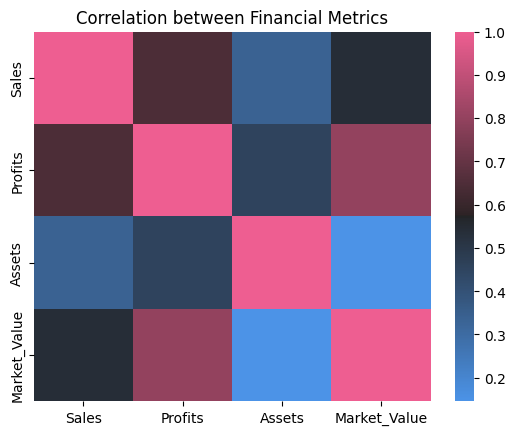

In [13]:
#correlation between financial metrics
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(data[['Sales','Profits','Assets','Market_Value']].corr(method='pearson'), cmap=cmap)
plt.title('Correlation between Financial Metrics')
plt.show()

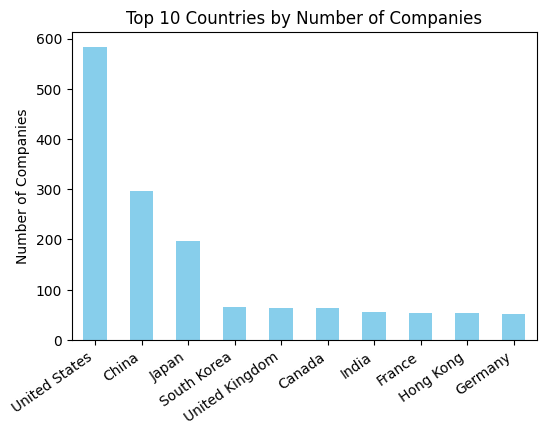

In [36]:
# Top Countries by Number of Companies
country_counts = data['Country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(6, 4))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Number of Companies')
plt.ylabel('Number of Companies')
plt.xticks(rotation=35, ha='right')
plt.show()

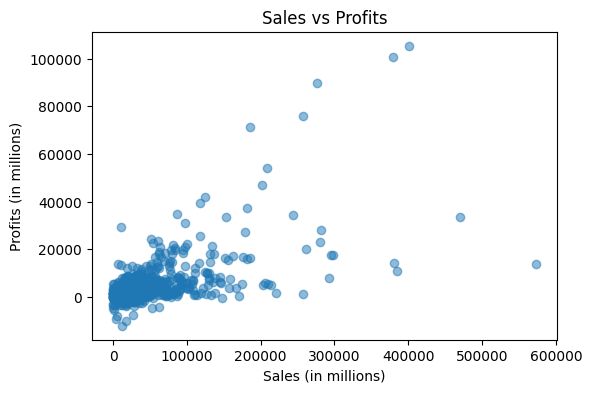

In [33]:
# Scatter plot of 'Sales' vs 'Profit'
plt.figure(figsize=(6, 4))
plt.scatter(data['Sales'], data['Profits'], alpha=0.5)
plt.title('Sales vs Profits')
plt.xlabel('Sales (in millions)')
plt.ylabel('Profits (in millions)')
plt.show()

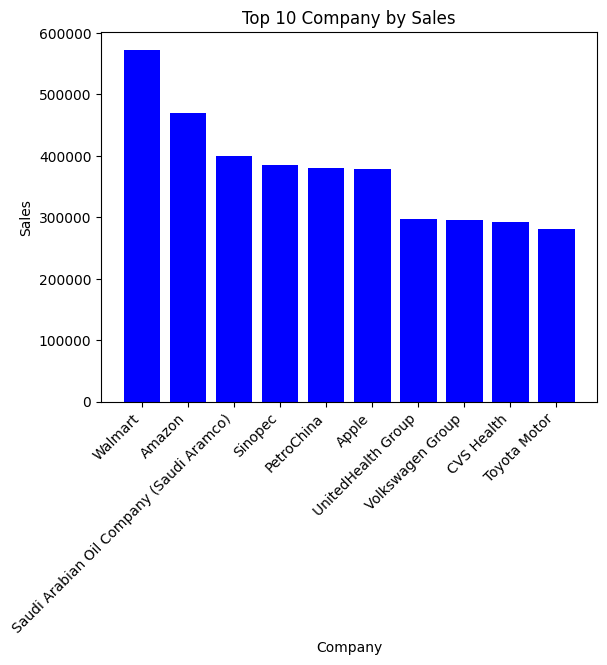

In [18]:
# Top 10 companies by Sales

sort_by_sales = data.sort_values(by= "Sales", ascending=False)
top10bysales = sort_by_sales.head(10)

x = top10bysales['Company']
y = top10bysales['Sales']

plt.bar(x, y, color= 'b')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Top 10 Company by Sales")
plt.xlabel("Company")
plt.ylabel("Sales")
plt.show()

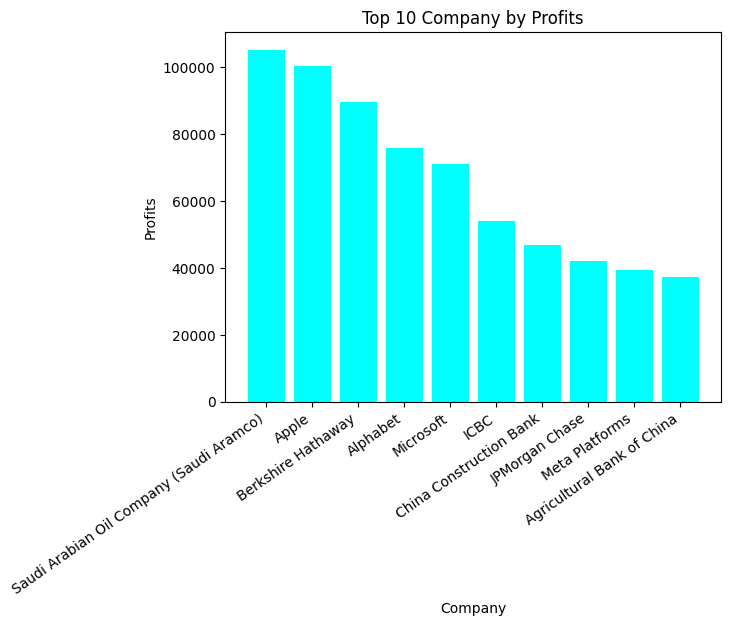

In [19]:
# Top 10 compacompanies by profit

sort_by_profit = data.sort_values(by= "Profits", ascending=False)
top10byprofit = sort_by_profit.head(10)

x1 = top10byprofit['Company']
y1 = top10byprofit['Profits']

plt.bar(x1, y1, color= 'cyan')
plt.xticks(rotation=35, horizontalalignment='right')
plt.title("Top 10 Company by Profits")
plt.xlabel("Company")
plt.ylabel("Profits")
plt.show()

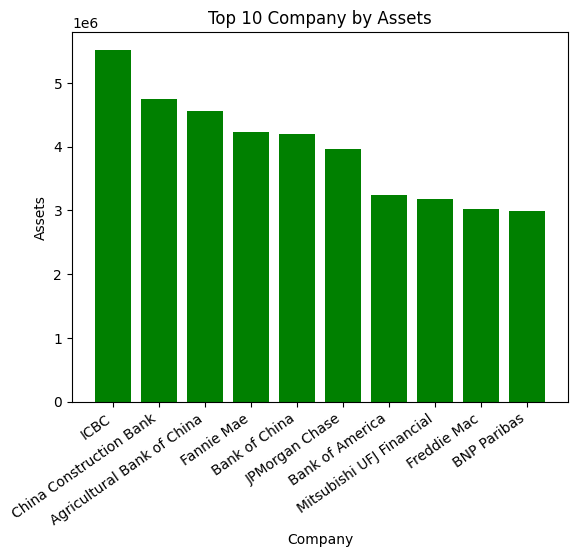

In [20]:
# Top 10 companies by Assets

sort_by_asset = data.sort_values(by= "Assets", ascending=False)
top10byasset = sort_by_asset.head(10)

x2 = top10byasset['Company']
y2 = top10byasset['Assets']

plt.bar(x2, y2, color= 'g')
plt.xticks(rotation=35, horizontalalignment='right')
plt.title("Top 10 Company by Assets")
plt.xlabel("Company")
plt.ylabel("Assets")
plt.show()

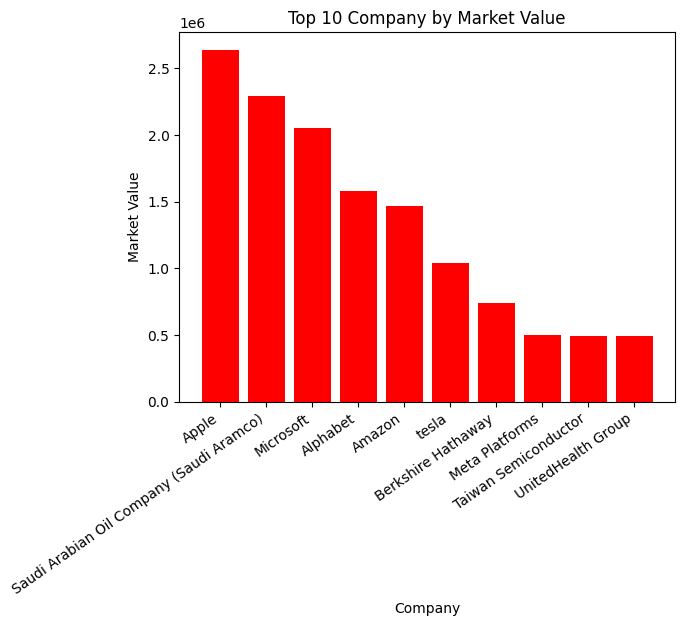

In [21]:
# Top 10 companies by Market Value

sort_by_mv = data.sort_values(by= "Market_Value", ascending=False)
top10bymv = sort_by_mv.head(10)

x3 = top10bymv['Company']
y3 = top10bymv['Market_Value']

plt.bar(x3, y3, color= 'r')
plt.xticks(rotation=35, horizontalalignment='right')
plt.title("Top 10 Company by Market Value")
plt.xlabel("Company")
plt.ylabel("Market Value")
plt.show()

# Profit Margin by Industry

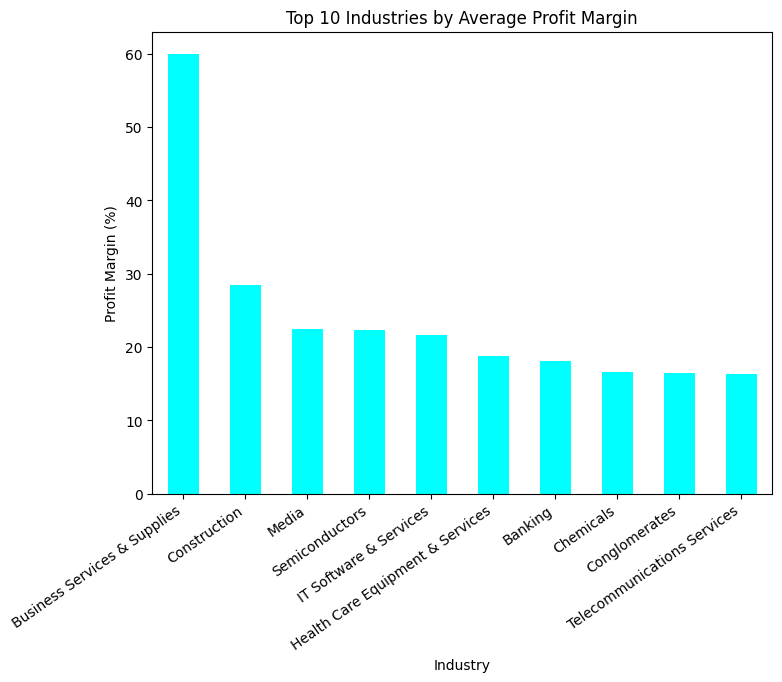

In [22]:

data['Profit_Margin'] = (data['Profits'] / data['Sales']) * 100

# Grouping by industry
industry_profit_margin = data.groupby('Industry')['Profit_Margin'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
industry_profit_margin.plot(kind='bar', color='cyan')
plt.title('Top 10 Industries by Average Profit Margin')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=35, ha='right')
plt.show()

# Return on Assets (ROA)

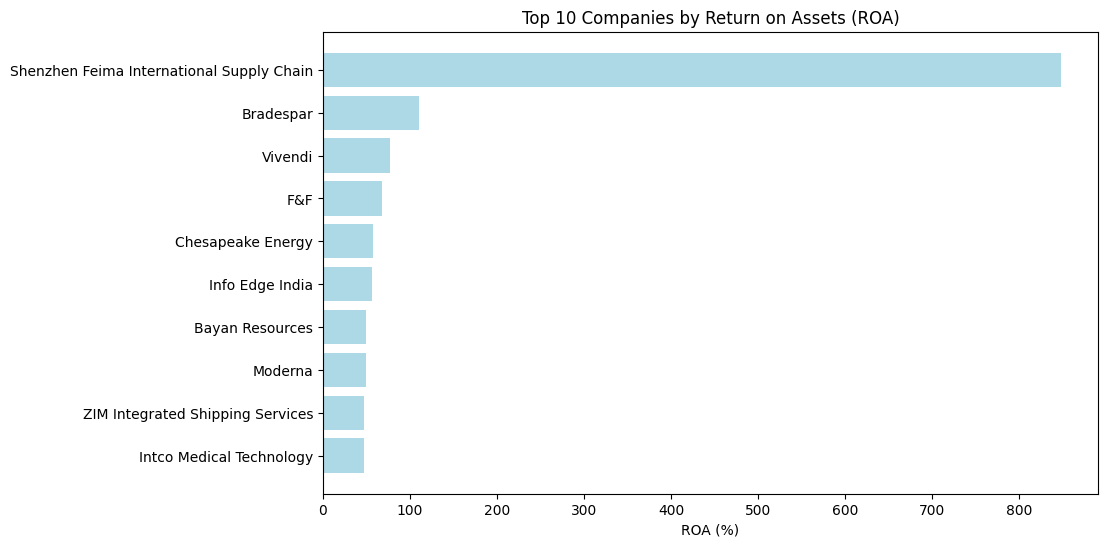

In [31]:
data['ROA'] = (data['Profits'] / data['Assets']) * 100

top_roa_companies = data[['Company', 'ROA']].sort_values(by='ROA', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_roa_companies['Company'], top_roa_companies['ROA'], color='lightblue')
plt.title('Top 10 Companies by Return on Assets (ROA)')
plt.xlabel('ROA (%)')
plt.gca().invert_yaxis()
plt.show()

# Comparison of Major Economies (e.g., USA vs China)

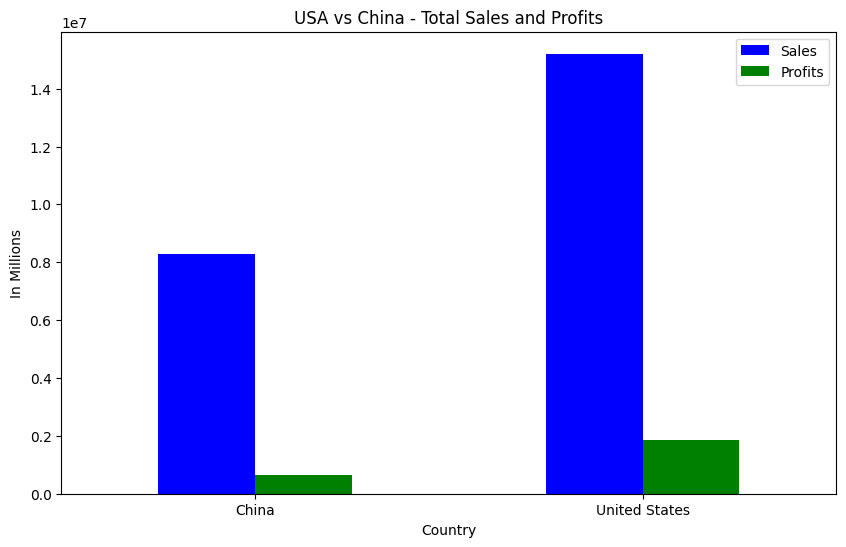

In [29]:
usa_china_data = data[data['Country'].isin(['United States', 'China'])]

# Grouping by country and summing sales and profits
usa_china_sales_profits = usa_china_data.groupby('Country')[['Sales', 'Profits']].sum()

# Plotting
usa_china_sales_profits.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title('USA vs China - Total Sales and Profits')
plt.ylabel('In Millions')
plt.xticks(rotation=0)
plt.show()